# Training and Validation Data Setup

This notebook deals with structural magnetic resonance (MR) images of the brain. Specifically, we will be dealing with two types of MR images: T1-weighted (T1-w) and T2-weighted (T2-w) MR images. Collecting these different types of images is time-consuming and therefore not always done. When a patient doesn’t have one of the two types of images, we can use deep learning to fill in the missing data. Here we will assume that a new patient will always have a T1-w image but not necessarily a T2-w image. However, we have access to a dataset of paired T1-w and T2-w images from a cohort of patients, and so we will create a CNN to learn how to transform the T1-w images to an (approximate) T2-w image based on these training pairs. Then we’ll be able to use an unseen patient’s T1-w image and generate an approximate T2-w image. While this approximate T2-w image wouldn’t be used for diagnostic purposes, the approximate image can be used as input to other image processing algorithms.

In this milestone we’ll get basic familiarity with handling the `NIfTI` file format—the file format in which the MR images are provided so that we can feed the images into a deep neural network. To do so, we’ll take an example image from the training set and extract, manipulate, and visualize the data. 


In [1]:
import os
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import nibabel as nib
from nibabel.testing import data_path

In [2]:
IMAGE_DIR_T1 = "data/images/small/t1"
IMAGE_DIR_T2 = "data/images/small/t2"

# Specify the pair of image filenames
IMAGE_FILENAME_T1 = "IXI162-HH-1548-T1_fcm.nii.gz"
IMAGE_FILENAME_T2 = "IXI162-HH-1548-T2_reg_fcm.nii.gz"

T1_FILENAME = IMAGE_DIR_T1 + "/" + IMAGE_FILENAME_T1
T2_FILENAME = IMAGE_DIR_T2 + "/" + IMAGE_FILENAME_T2

In [3]:
image_t1 = nib.load(T1_FILENAME)
image_t2 = nib.load(T2_FILENAME)

image_data_t1 = image_t1.get_fdata()
image_data_t2 = image_t2.get_fdata()

In [4]:
print("T1 shape:", image_data_t1.shape)
print("T2 shape:", image_data_t2.shape)

T1 shape: (120, 120, 90)
T2 shape: (120, 120, 90)


The header of an image contains the image metadata. The information in the header will differ between different image formats.

In [5]:
header = image_t1.header
print(header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 120 120  90   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.         2.0084033  2.0084033  2.011236   0.         0.
  0.         0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : unknown
quatern_b       : 0.49428117
quatern_c       : -0.53697896
quatern_d       : -0.43950534
qoffset_x       : -84.56341
qoffset_y  

In [6]:
plt.rcParams["figure.figsize"] = (20,4)

def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))

    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

**Plot the source (T1-w) image**

Text(0.5, 0.98, 'Center slices for T1-w image')

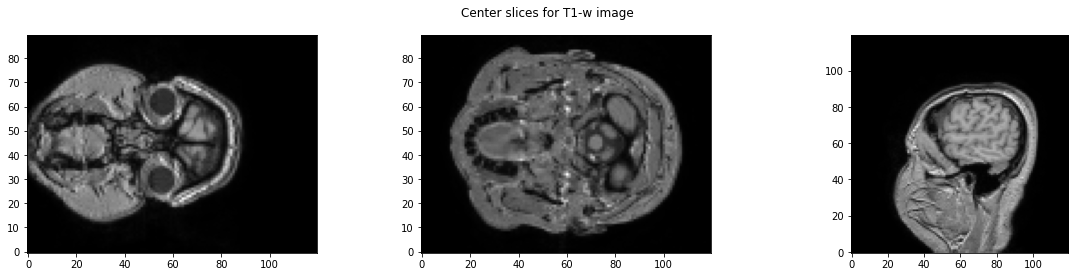

In [7]:
slice_0 = image_data_t1[26, :, :]
slice_1 = image_data_t1[:, 30, :]
slice_2 = image_data_t1[:, :, 16]

show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for T1-w image")  

**Plot the target (T2-w) image**

Text(0.5, 0.98, 'Center slices for T2-w image')

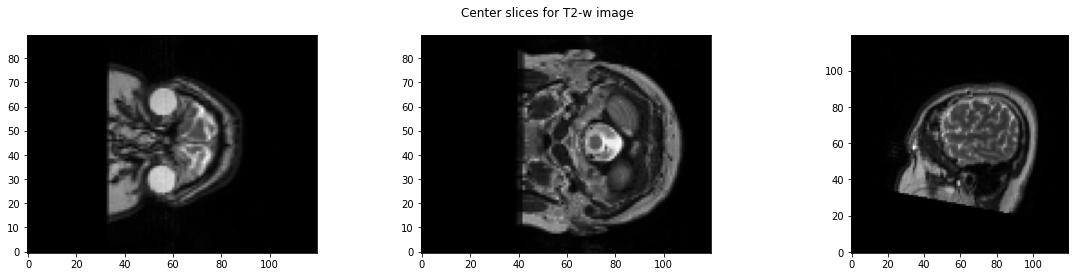

In [8]:
slice_0 = image_data_t2[26, :, :]
slice_1 = image_data_t2[:, 30, :]
slice_2 = image_data_t2[:, :, 16]

show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for T2-w image")  